# Related Artists Spotify Playlist Generator
This file shows the skills of using Spotify's API to create related artists playlist generator.

- Used the following libraries:
- To make an API request, GET and POST - requests
- To decode JSON - json

## Workflow
1. Get Artist
2. Get Related Artists
3. Create Playlist
4. Loop Through Artist and Related Artists 
    - 4.1 Get Artist's Top Tracks 
    - 4.2 Add Tracks to Playlist 

### API endpoints in the Spotify Web API Console  
https://developer.spotify.com/console/

### Web API Reference  
https://developer.spotify.com/documentation/web-api/reference/

In [789]:
# Import package to make API requests
import requests

# Import json package to decode JSON
import json


In [790]:
# If token expires, refresh by going to 
# https://developer.spotify.com/console/post-playlists/
# Select playlist-modify-private
oauth_token ='BQCB-hPsnghJ7I_EbclWISmbM27udk_kg7vpY4mzt1xKpOsi5bgo6hsV0jOtmrA8LzFN1qDSfXjsbbRVKtgVGa2AKex1X7f8U_XFEmrCnZSCynVzhZGpuX2BlQvsNNrL5_rUNC_E1vr3GeSvmdizrS_7Y4ClXgAHHQedQ_ymjvShhSaefhIK-cShzhhQAfJ4l5U'
# Pass in oauth_token into the Authorization header
headers = {'Authorization':f'Bearer {oauth_token}'}

## Getting the Artist


In [791]:
# I am picking my favorite band, Glass animals.
# The id is selected from the Spotify web browser.
source_artist_id = '4yvcSjfu4PC0CYQyLy4wSq'

In [792]:
artist_endpoint_url = f'https://api.spotify.com/v1/artists/{source_artist_id}'

In [793]:
artists_api_request = requests.get(artist_endpoint_url, headers=headers)

In [794]:
artists_api_request

<Response [200]>

In [795]:
# Verifying the the request output
artists_api_request.text

'{\n  "external_urls" : {\n    "spotify" : "https://open.spotify.com/artist/4yvcSjfu4PC0CYQyLy4wSq"\n  },\n  "followers" : {\n    "href" : null,\n    "total" : 2481550\n  },\n  "genres" : [ "gauze pop", "indietronica", "shiver pop" ],\n  "href" : "https://api.spotify.com/v1/artists/4yvcSjfu4PC0CYQyLy4wSq",\n  "id" : "4yvcSjfu4PC0CYQyLy4wSq",\n  "images" : [ {\n    "height" : 640,\n    "url" : "https://i.scdn.co/image/ab6761610000e5ebe113ca9b6bcd3d3cfc3ad784",\n    "width" : 640\n  }, {\n    "height" : 320,\n    "url" : "https://i.scdn.co/image/ab67616100005174e113ca9b6bcd3d3cfc3ad784",\n    "width" : 320\n  }, {\n    "height" : 160,\n    "url" : "https://i.scdn.co/image/ab6761610000f178e113ca9b6bcd3d3cfc3ad784",\n    "width" : 160\n  } ],\n  "name" : "Glass Animals",\n  "popularity" : 87,\n  "type" : "artist",\n  "uri" : "spotify:artist:4yvcSjfu4PC0CYQyLy4wSq"\n}'

In [797]:
# Converting the text into a dictionary
artist_api_response = json.loads(artists_api_request.text)

In [798]:
# checking that the type is a dictionary
type(artist_api_response)

dict

In [799]:
artist_api_response['name']

'Glass Animals'

In [800]:
source_artist_name = artist_api_response['name']

### Get Related Artists

In [801]:
# Getting related artists endpoint to the source artist id
related_artists_endpoint_url = f'https://api.spotify.com/v1/artists/{source_artist_id}/related-artists'

In [802]:
# making the api request
related_artists_api_request = requests.get(related_artists_endpoint_url,headers=headers)

In [803]:
#  Respond 200 meaning is succeeded
related_artists_api_request

<Response [200]>

In [804]:
# Converting the API text respond to a dictionary
related_artists_api_response = json.loads(related_artists_api_request.text)

In [805]:
# Listing all the keys of a dictionary
related_artists_api_response.keys()

dict_keys(['artists'])

In [806]:
len(related_artists_api_response['artists'])

20

In [807]:
# Listing all the keys of a dictionary
related_artists_api_response['artists'][0].keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [808]:
# Verifying the first element of the dict
related_artists_api_response['artists'][0]['name']

'Electric Guest'

In [809]:
# Looping through the list and picking the top 3 of related artists
selected_releatd_artists = {}

for artist in related_artists_api_response['artists'][0:3]:
    print(artist)
    selected_releatd_artists[artist['name']] = artist['id']
    print('-'*50)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/7sgWBYtJpblXpJl2lU5WVs'}, 'followers': {'href': None, 'total': 311544}, 'genres': ['alternative dance', 'indie rock', 'indietronica', 'la indie', 'modern rock', 'shimmer pop', 'vapor soul'], 'href': 'https://api.spotify.com/v1/artists/7sgWBYtJpblXpJl2lU5WVs', 'id': '7sgWBYtJpblXpJl2lU5WVs', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb44b0ae44df3ba93849932281', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab6761610000517444b0ae44df3ba93849932281', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f17844b0ae44df3ba93849932281', 'width': 160}], 'name': 'Electric Guest', 'popularity': 61, 'type': 'artist', 'uri': 'spotify:artist:7sgWBYtJpblXpJl2lU5WVs'}
--------------------------------------------------
{'external_urls': {'spotify': 'https://open.spotify.com/artist/1dWEYMPtNmvSVaDNLgB6NV'}, 'followers': {'href': None, 'total': 552309}, 'genres': ['la indi

In [810]:
# Printing the dict
selected_releatd_artists

{'Electric Guest': '7sgWBYtJpblXpJl2lU5WVs',
 'Saint Motel': '1dWEYMPtNmvSVaDNLgB6NV',
 'Sir Sly': '3DFoVPonoAAt4EZ1FEI8ue'}

In [811]:
selected_releatd_artists[source_artist_name] = source_artist_id


### Creation of the  Playlist

In [812]:
# My user info has been redacted
user_id = '*******'

In [813]:
playlist_endpoint_url = f'https://api.spotify.com/v1/users/{user_id}/playlists'

request_body = json.dumps({
    'name':f'{source_artist_name} Mixtap',
    'description': f'Python-generated playlist using artists related to {source_artist_name}',
    'public': False
})

# POST
playlist_api_request = requests.post(playlist_endpoint_url, headers= headers, data= request_body)

In [814]:
playlist_api_request

<Response [201]>

In [815]:
json.loads(playlist_api_request.text)

{'collaborative': False,
 'description': 'Python-generated playlist using artists related to Glass Animals',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/60rOl4UabjhkKkSW0q7j1k'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/60rOl4UabjhkKkSW0q7j1k',
 'id': '60rOl4UabjhkKkSW0q7j1k',
 'images': [],
 'name': 'Glass Animals Mixtap',
 'owner': {'display_name': 'Itay Turgeman',
  'external_urls': {'spotify': 'https://open.spotify.com/user/21y4cfzsq4slhxrguxpkilc7i'},
  'href': 'https://api.spotify.com/v1/users/21y4cfzsq4slhxrguxpkilc7i',
  'id': '21y4cfzsq4slhxrguxpkilc7i',
  'type': 'user',
  'uri': 'spotify:user:21y4cfzsq4slhxrguxpkilc7i'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'MSxhYTg5OWU3MzQxODY5NTU4OWY2YzUwYmYyNzdlNGMxYzYyNjBmMDUy',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/60rOl4UabjhkKkSW0q7j1k/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
 

In [816]:
playlist_api_response = json.loads(playlist_api_request.text)

#### reassigning some variables for ease of use with the following loop and POST request

In [817]:
playlist_api_response['id']

'60rOl4UabjhkKkSW0q7j1k'

In [818]:
playlist_id = playlist_api_response['id']

In [819]:
playlist_api_response['external_urls']['spotify']


'https://open.spotify.com/playlist/60rOl4UabjhkKkSW0q7j1k'

In [820]:
playlist_url = playlist_api_response['external_urls']['spotify']

### Getting Artist's Top Tracks and inserting it to the Playlist that was created

In [831]:
# uris is Spotify's own serial for each song
selected_tracks_uris = []


for artist in selected_releatd_artists:
    print(artist,selected_releatd_artists[artist])
    artist_id = selected_releatd_artists[artist]
    artist_top_tracks_endpoint_url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks'

    # Same as market

    params = {'country':'US'}
    artist_top_tracks_api_request = requests.get(artist_top_tracks_endpoint_url, headers = headers, params= params)

    artist_top_tracks_api_response = json.loads(artist_top_tracks_api_request.text)

    for track in artist_top_tracks_api_response['tracks'][0:5]:
        print(artist, track['name'], track['uri'])
        selected_tracks_uris.append(track['uri'])
    print('-'*50)


Electric Guest 7sgWBYtJpblXpJl2lU5WVs
Electric Guest Oh Devil spotify:track:1kcfGBb6kSrGqNIMW7rAlB
Electric Guest Dollar spotify:track:0z4zZNViQ01puQOlAFGGUy
Electric Guest This Head I Hold spotify:track:1tzPSule9WZ9B8SujHv8fp
Electric Guest Dear To Me spotify:track:4hh1lvWiUaLMOcVXhyK6TA
Electric Guest Oh Devil - Radio Version spotify:track:6KwSdmAba8BxoxVXPw70LO
--------------------------------------------------
Saint Motel 1dWEYMPtNmvSVaDNLgB6NV
Saint Motel My Type spotify:track:2Iq6HhIquO7JKr0KfTNLzU
Saint Motel Sweet Talk spotify:track:6kcHg7XL6SKyPNd78daRBL
Saint Motel Cold Cold Man spotify:track:6RKGBcDtgzXx21zUjpeu6F
Saint Motel A Good Song Never Dies spotify:track:5K43AHQPTJTqlyRZ3uBGKz
Saint Motel For Elise spotify:track:6i40XRqEwHAnSxwZWasMRp
--------------------------------------------------
Sir Sly 3DFoVPonoAAt4EZ1FEI8ue
Sir Sly High spotify:track:17aDyX39gb1iV1ZWvD1ffE
Sir Sly &Run spotify:track:0w4m3Xp4svlIoyL94Zjlyd
Sir Sly Astronaut spotify:track:3q5Zm5NnYcpXKLNmTO1tyo

In [832]:
# Printing the tracks uris for validation
selected_tracks_uris

['spotify:track:1kcfGBb6kSrGqNIMW7rAlB',
 'spotify:track:0z4zZNViQ01puQOlAFGGUy',
 'spotify:track:1tzPSule9WZ9B8SujHv8fp',
 'spotify:track:4hh1lvWiUaLMOcVXhyK6TA',
 'spotify:track:6KwSdmAba8BxoxVXPw70LO',
 'spotify:track:2Iq6HhIquO7JKr0KfTNLzU',
 'spotify:track:6kcHg7XL6SKyPNd78daRBL',
 'spotify:track:6RKGBcDtgzXx21zUjpeu6F',
 'spotify:track:5K43AHQPTJTqlyRZ3uBGKz',
 'spotify:track:6i40XRqEwHAnSxwZWasMRp',
 'spotify:track:17aDyX39gb1iV1ZWvD1ffE',
 'spotify:track:0w4m3Xp4svlIoyL94Zjlyd',
 'spotify:track:3q5Zm5NnYcpXKLNmTO1tyo',
 'spotify:track:0sL5WC2mgffTiCXUA0g2nh',
 'spotify:track:5GbK9am1svakX356ltRPcm',
 'spotify:track:02MWAaffLxlfxAUY7c5dvx',
 'spotify:track:0rRjGruFonCGOt0S5zAJNQ',
 'spotify:track:7vZqwaSk4sVcDyZbMcxS8N',
 'spotify:track:37adYGaYaAWTGhBaOzX4Fh',
 'spotify:track:1gk3FhAV07q9Jg77UxnVjX']

#### I am converting the uris tracklist into a JSON string and inserting the uris tracks list into the created playlist via POST. 

In [833]:
playlist_tracks_endpoint_url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'

request_body = json.dumps({'uris':selected_tracks_uris
})
playlist_tracks_api_request = requests.post(playlist_tracks_endpoint_url, headers=headers,data = request_body)

In [834]:
playlist_tracks_api_request

<Response [201]>

Respond 201 is success. The follwing snapshot is from my spotify app which shows the playlist the code created.
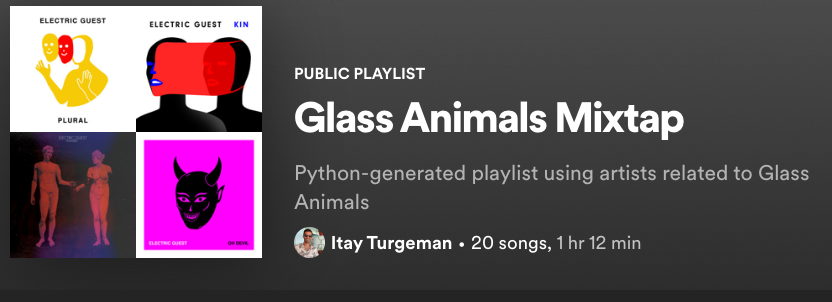